In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# **CREDIT CARD FRAUD DETECTION**
**Dataset 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'**

**Features Description**

In [2]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# splitting
from sklearn.model_selection import train_test_split

# library untuk preprocessing
# column transformer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# library untuk scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names
import sklearn
from sklearn.model_selection import StratifiedKFold

# modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# evaluation 
from sklearn.metrics import accuracy_score, recall_score

# hyperparameter tuning 
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report



**Explanation of dataset from Kaggle**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**Business Problems**

As a data scientist at a top bank in Indonesia, our team received reports from the credit card department regarding customer complaints about fraud. Customers question the absence of a fraud detection system to alert them before too many transactions become criminal, thus minimizing losses.

The dataset includes a feature called 'Class', where 0 indicates no fraudulent activity and 1 indicates detected fraud. Using the confusion matrix, we anticipate two outcomes: false positives and false negatives.

- False positives occur when the machine detects fraud despite no actual fraud in the data. If this persists, it could lead to credit card blocks, impacting customer trust. Estimated company losses from false positives may reach around 2 million IDR.

- False negatives occur when the machine fails to detect fraud despite its presence in the data. This undermines our safety reputation, as the system fails to comprehend criminal activity. The financial losses from these missed detections far exceed those from false positives.

To address this, our analysis prioritizes recall scoring to focus on reducing the number of false negatives.

**Steps to Follow:**
To address this problem, here are the steps I take:

1. Perform simple Exploratory Data Analysis (EDA) to explore the dataset.
2. Define the preprocessing steps that I should take before modeling.
3. Perform cross-validation to determine the best-fit model among logistic regression, K-Nearest Neighbors (KNN), and decision tree.
4. Select the best-fit model and then perform hyperparameter tuning.
5. Test the model on the test dataset to evaluate the results.

## **1. Load Dataset**

In [3]:
df = pd.read_csv('creditcard.csv')
pd.set_option('display.max_column',None)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.duplicated().sum()

1081

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [10]:
df['Class'].value_counts()

# From this result 0 is no fraud meanwhile 1 is fraud

Class
0    283253
1       473
Name: count, dtype: int64

The data is imbalanced, that's why we are gonna use recall for the scoring technique

## **2. EDA**

In [11]:
len(df.columns)

31

C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()

C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Intania\AppData\Local\Temp\ipykernel_18120\3203265663.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()

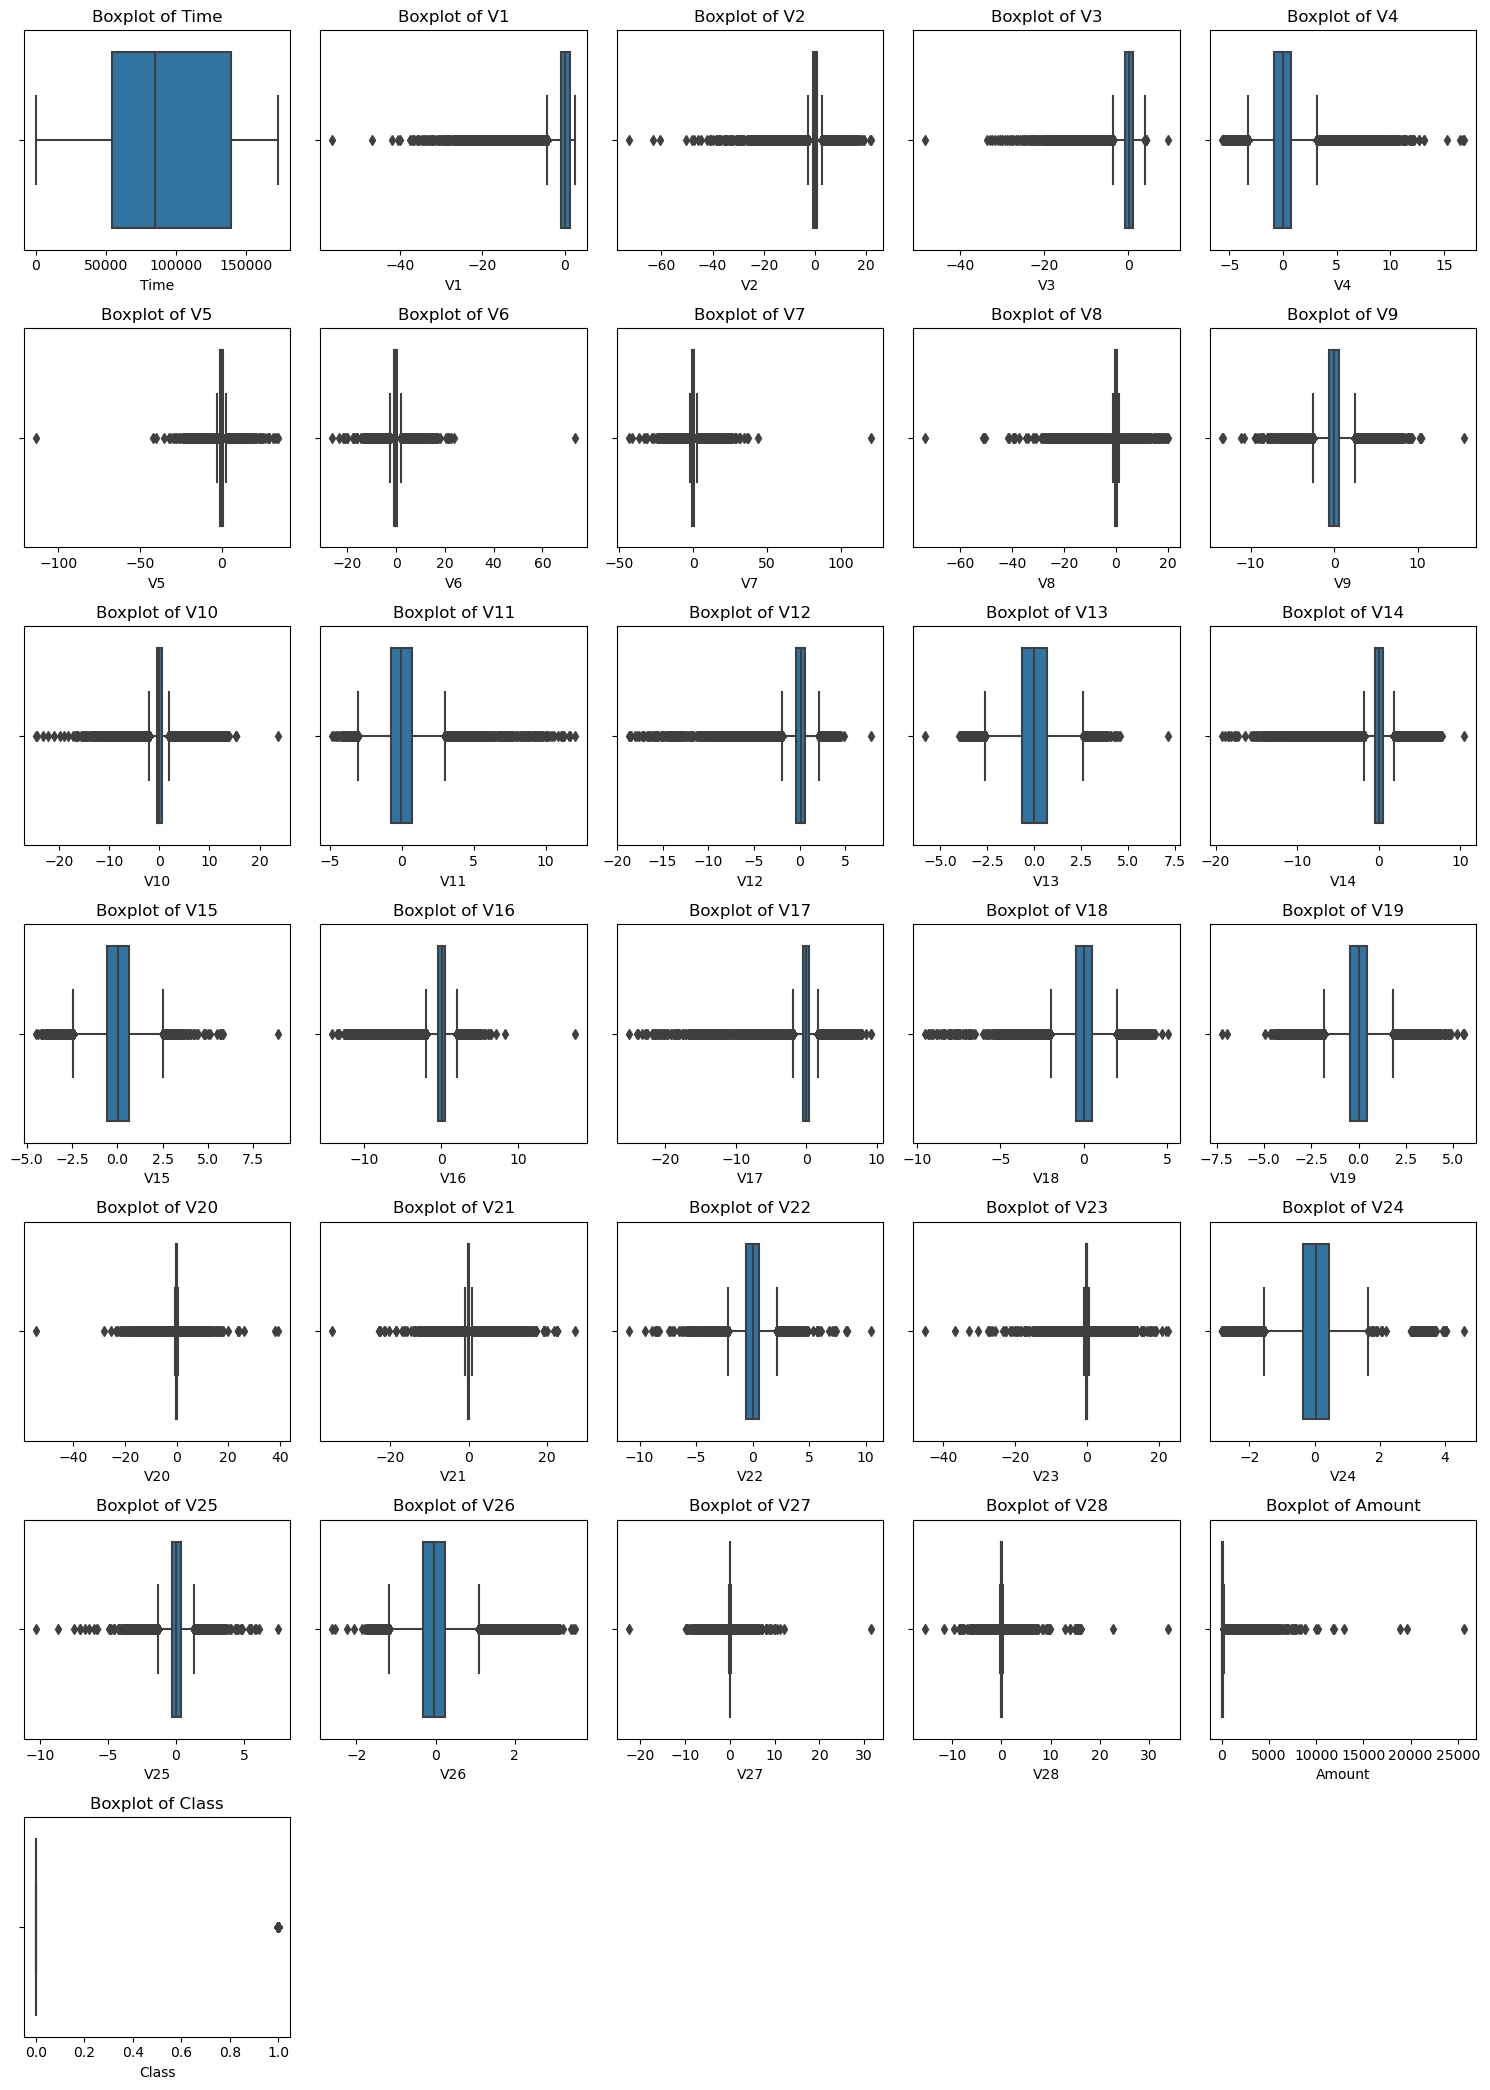

In [12]:
num_cols = len(df.columns)
num_rows = (num_cols + 4) // 5  # This ensures at least 5 plots per row, adjust as needed

plt.figure(figsize=(15, 3 * num_rows))  # Adjust height based on number of rows

subplot = 1
for i in df.columns:
    plt.subplot(num_rows, 5, subplot)

    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.tight_layout()

    subplot += 1

plt.show()

First, I would like to remove the outliers. However, in this case, outliers represent potential fraud instances. Therefore, I will proceed without removing any outliers. Additionally, from the boxplot, we can observe that the distribution is not normal. Hence, all the statistical tests needed in the future will employ non-parametric methods.

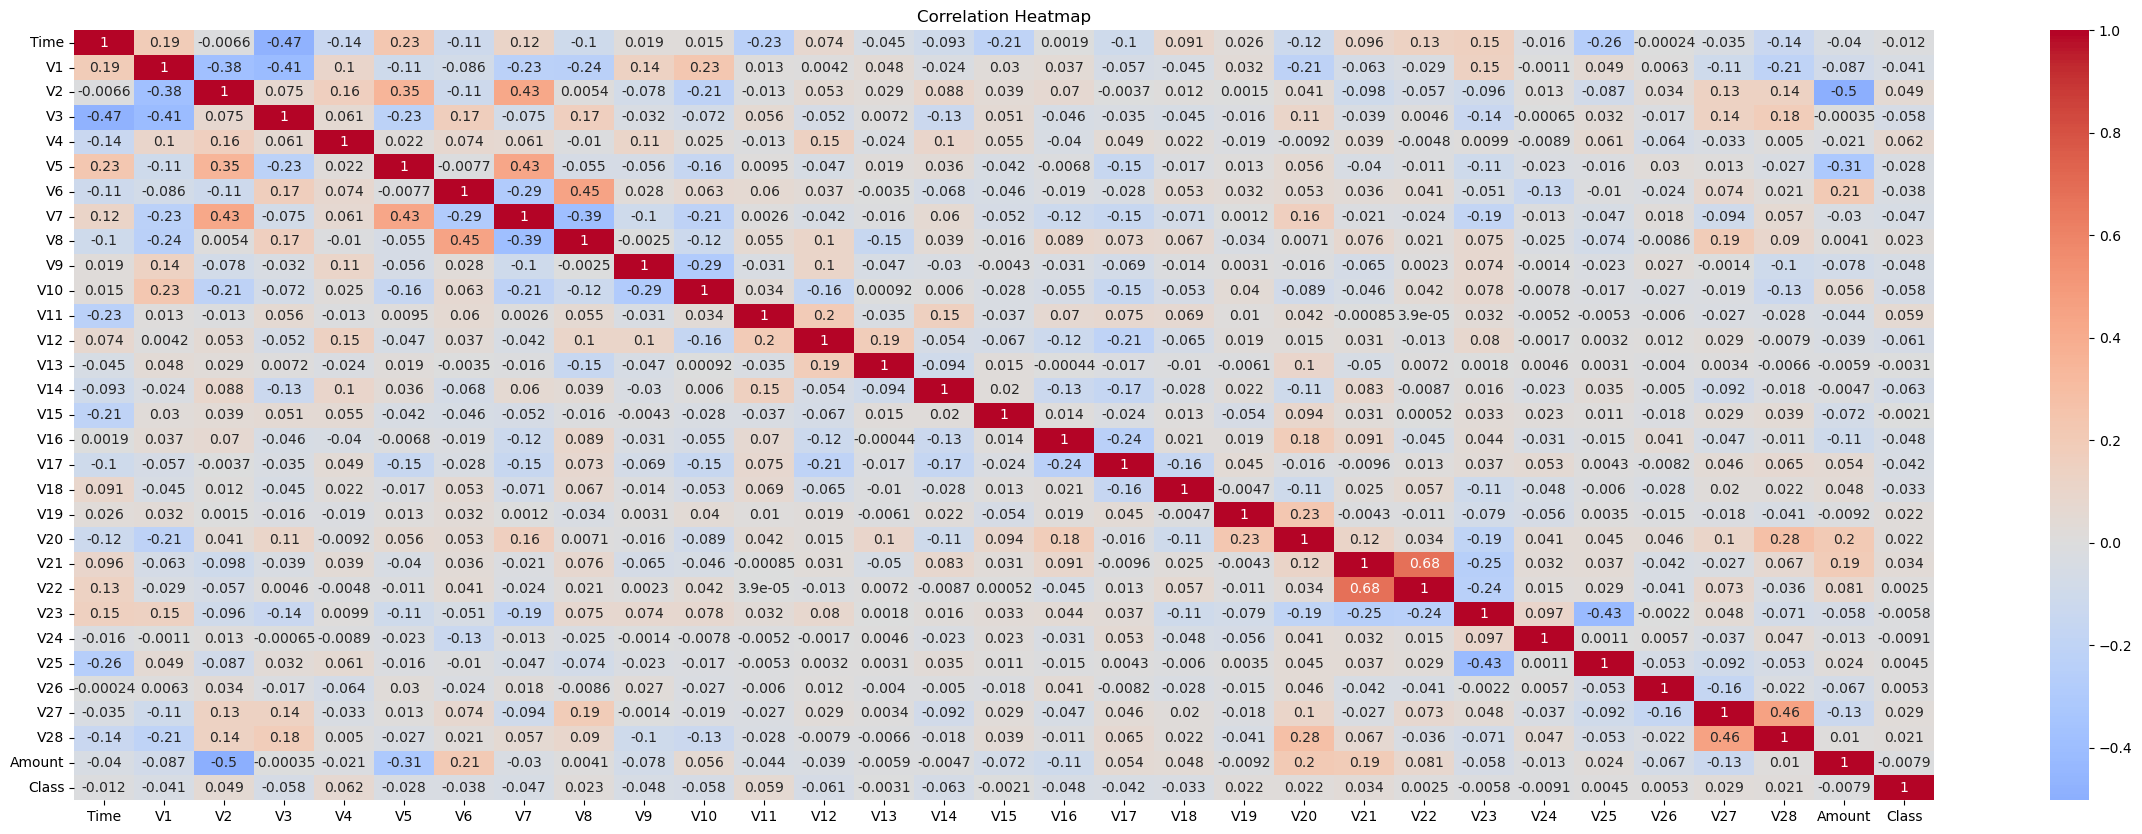

In [13]:
plt.figure(figsize=(30, 10))
sns.heatmap(data=df.corr(method='spearman'),
            annot=True,   # Show correlation values on the heatmap
            cmap='coolwarm',   # Color map
            center=0)   # Mask to hide values with correlation less than 0.5

plt.title('Correlation Heatmap')
plt.show()

From the heatmap, very few features show strong correlations with each other.

## **3. Define X and y**

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
X = df.drop(columns='Class')
y = df['Class']

## **4. Splitting Data**

In [16]:
X_train,X_test,y_train,y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state= 0,
                                                    stratify= y 
                                                )

## **5. Data Preprocessing - Prepare transform and pipeline**

the only process is only robust scaling for all the features

In [17]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [18]:
transformer = ColumnTransformer ([
    ('robust_scaler',RobustScaler(),['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])
])
transformer

ColumnTransformer(transformers=[('robust_scaler', RobustScaler(),
                                 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                  'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
                                  'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                                  'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
                                  'V26', 'V27', 'V28', 'Amount'])])

In [19]:
# transformer.fit(X_train)

# X_train_transform = transformer.transform(X_train)
# X_test_transform = transformer.transform(X_test)

In [20]:

# X_train_transform_df = pd.DataFrame(X_train_transform)
# X_test_transform_df = pd.DataFrame(X_test_transform)

In [21]:
# columns_name  = transformer.get_feature_names_out()

In [22]:
# X_train_transform_df.columns = columns_name
# X_test_transform_df.columns = columns_name

## **6. Cross Validation - Find the best fit model**

We are going to use three models: logistic regression, KNN, and decision tree.

In [23]:
# define algoritma 
logreg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [24]:
list_algo = [logreg,knn,tree]
list_all_acc = []
list_mean_acc = []
list_std_acc =[]

for algo in list_algo :
    model = algo

    # pipeline 
    pipe_model = Pipeline([
        ('preprocessing',transformer),
    ('modeling', model )
    ])

    # define kfold 
    fold = StratifiedKFold(n_splits=5) 

    # For classification, we can use StratifiedKFold
    # for regression, we can use KFold because there's no need for division or stratification. 

    crossval = cross_val_score(estimator=pipe_model, # model 
                X = X_train,
                y = y_train,
                cv = fold, # We also can input integer, and by default is 5
                scoring = 'recall') 
    
    # accuracy 
    list_all_acc.append(crossval.round(2))
    list_mean_acc.append(crossval.mean())
    list_std_acc.append(crossval.std())

c:\Users\Intania\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Intania\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [25]:
df_cv = pd.DataFrame()
df_cv['algo'] = list_algo
df_cv['all_score'] = list_all_acc
df_cv['mean'] = list_mean_acc
df_cv['std']= list_std_acc

df_cv

,algo,all_score,mean,std
0,LogisticRegression(),"[0.67, 0.55, 0.63, 0.57, 0.51]",0.584772,0.056282
1,KNeighborsClassifier(),"[0.72, 0.57, 0.74, 0.76, 0.72]",0.703404,0.066774
2,DecisionTreeClassifier(),"[0.75, 0.67, 0.8, 0.76, 0.7]",0.735298,0.048142


From the result i will gonna use decision tree

## **7. Hyperparameter Tuning**

In [26]:
# define algoritma
model = DecisionTreeClassifier()

# pipeline for preprocessing 
pipe_model = Pipeline([
('preprocessing',transformer),
('modeling', model )
])

# hyperparam 
hyperparam = { 
    'modeling__max_depth' : range (2,20,1),  # musti pakai double underscore 
    'modeling__min_samples_split' : range(2,50,1),
    'modeling__min_samples_leaf' : range(2,50,1)
}

randomsearch = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions=  hyperparam,
    cv=5,
    n_jobs= -1,
    n_iter = 50,
    scoring= 'recall'
)

In [27]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('robust_scaler',
                                                                               RobustScaler(),
                                                                               ['Time',
                                                                                'V1',
                                                                                'V2',
                                                                                'V3',
                                                                                'V4',
                                                                                'V5',
                                                                                'V6',
                                                                                'V7',
                                                                                'V8',
                                                                                'V9',
                                                                                'V10',
                                                                                'V11',
                                                                                'V12',
                                                                                'V13',
                                                                                'V14',
                                                                                'V15',
                                                                                'V16',
                                                                                'V17',
                                                                                'V18',
                                                                                'V19',
                                                                                'V20',
                                                                                'V21',
                                                                                'V22',
                                                                                'V23',
                                                                                'V24',
                                                                                'V25',
                                                                                'V26',
                                                                                'V27',
                                                                                'V28',
                                                                                'Amount'])])),
                                             ('modeling',
                                              DecisionTreeClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__max_depth': range(2, 20),
                                        'modeling__min_samples_leaf': range(2, 50),
                                        'modeling__min_samples_split': range(2, 50)},
                   scoring='recall')

## **8. Predict to test Set**

Before tuning

In [28]:
model = DecisionTreeClassifier()

# pipeline for preprocessing 
pipe_model = Pipeline([
('preprocessing',transformer),
('modeling', model )
])

# fitting to model
pipe_model.fit(X_train,y_train)

# predict to model
y_pred_before = pipe_model.predict(X_test)

# recall score 
recall_score(y_test,y_pred_before)


0.7684210526315789

In [29]:
confusion_matrix(y_test, y_pred_before) 

array([[56632,    19],
       [   22,    73]], dtype=int64)

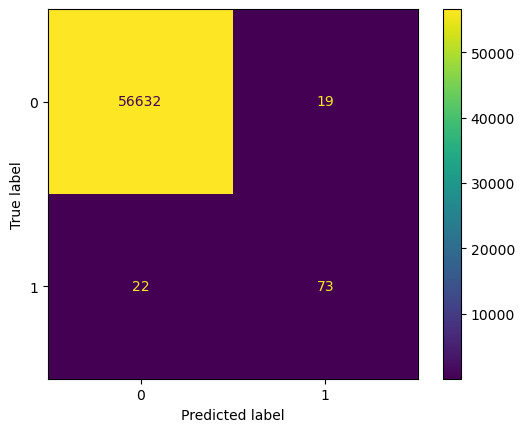

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_before) )
disp.plot()

After tuning

In [32]:
# define model
modeling = randomsearch.best_estimator_

# fitting
modeling.fit(X_train, y_train)

# predict
y_pred_after = modeling.predict(X_test)

# accuracy
recall_score(y_test, y_pred_after)

0.8

In [33]:
confusion_matrix(y_test,y_pred_after)

array([[56637,    14],
       [   19,    76]], dtype=int64)

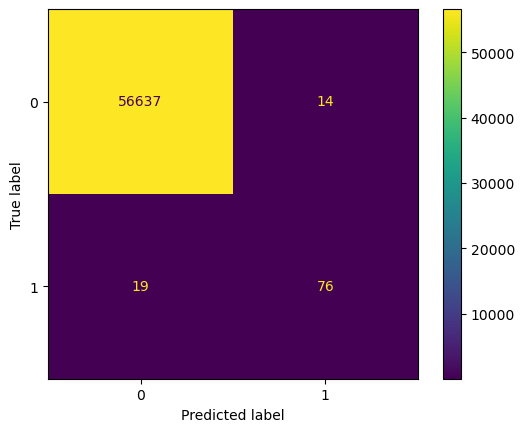

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_after) )
disp.plot()

In [36]:
randomsearch.best_params_

{'modeling__min_samples_split': 21,
 'modeling__min_samples_leaf': 10,
 'modeling__max_depth': 4}

After conducting the tests, our team can create a model using a decision tree with the following parameters:

- min_samples_split = 21
- min_samples_leaf = 10
- max_depth = 4

With this model, we could improve the recall score from 76.8% to 80%.